# The Single Neuron Logistic Regression Model

## Part 1: Set up

First we import our packages and read in our dataframe. There are 3 species in the "penguins" dataset. Previously, when creating the perceptron, we tried to use bill length and bill depth to classify specimens as either Adelie or Chinstrap. Below we can see that data (not linearly separable), along with an example of linearly separable data, using the Adelie and Gentoo species.

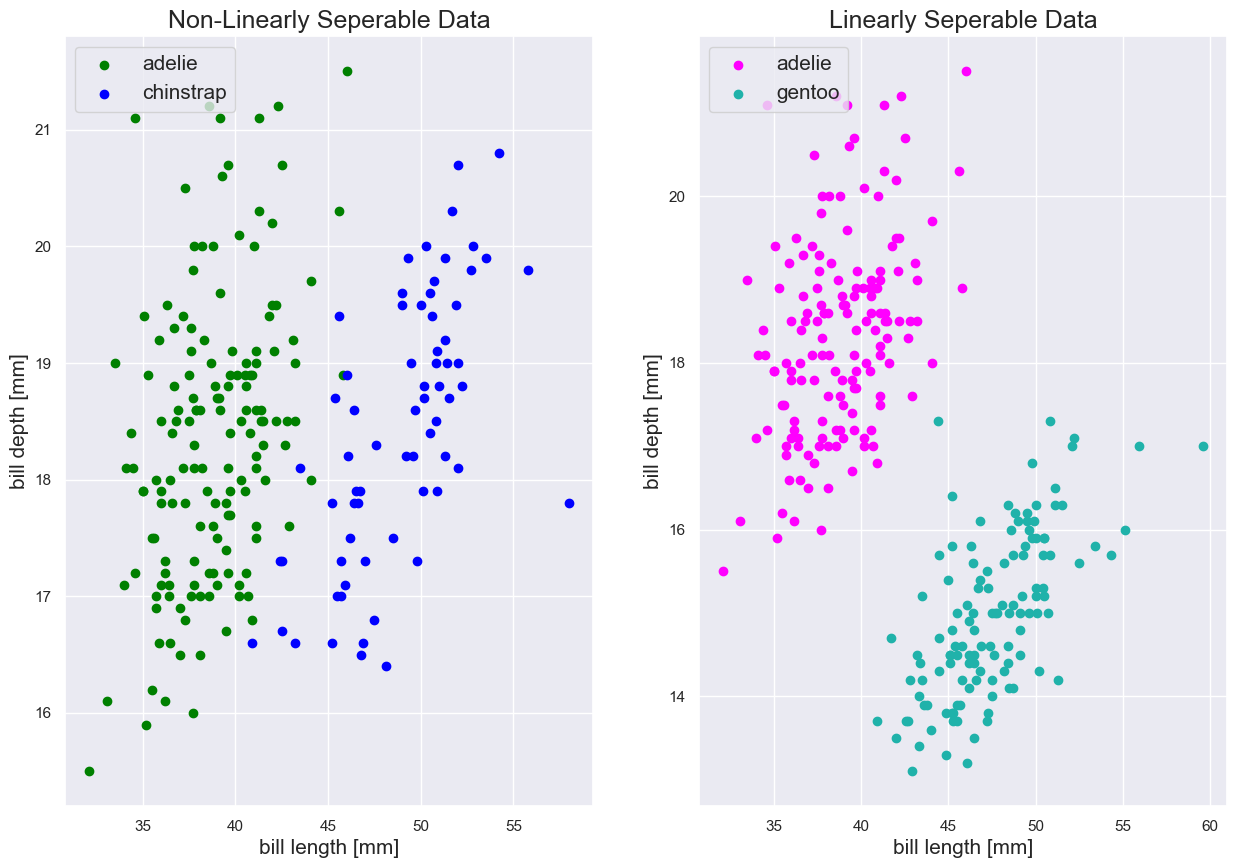

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

sns.set_theme()

df = sns.load_dataset("penguins")

adelie = df[df.species == "Adelie"]
chinstrap = df[df.species == "Chinstrap"]
gentoo = df[df.species == "Gentoo"]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ax1.scatter(adelie.bill_length_mm, 
            adelie.bill_depth_mm, 
            color = "green", 
            label = "adelie")
ax1.scatter(chinstrap.bill_length_mm, 
            chinstrap.bill_depth_mm, 
            color = "blue", 
            label = "chinstrap")
ax1.set_xlabel("bill length [mm]", fontsize = 15)
ax1.set_ylabel("bill depth [mm]", fontsize = 15)
ax1.legend(fontsize = 15, loc = "upper left")
ax1.set_title("Non-Linearly Seperable Data", fontsize = 18)


ax2.scatter(adelie.bill_length_mm, 
            adelie.bill_depth_mm, 
            color = "magenta", 
            label = "adelie")
ax2.scatter(gentoo.bill_length_mm, 
            gentoo.bill_depth_mm, 
            color = "lightseagreen", 
            label = "gentoo")
ax2.set_xlabel("bill length [mm]", fontsize = 15)
ax2.set_ylabel("bill depth [mm]", fontsize = 15)
ax2.legend(fontsize = 15, loc = "upper left")
ax2.set_title("Linearly Seperable Data", fontsize = 18)
plt.show()

Now we will focus on only examining bill length. The following plot uses a single vertical line to create a rough division in the data. In essence, most of the adelie penguins fall to the left and most chinstrap penguins fall to the right. This allows us to see that if a specimen falls to the left of the line it has a high **probability** of being an adelie penguin and vice versa.

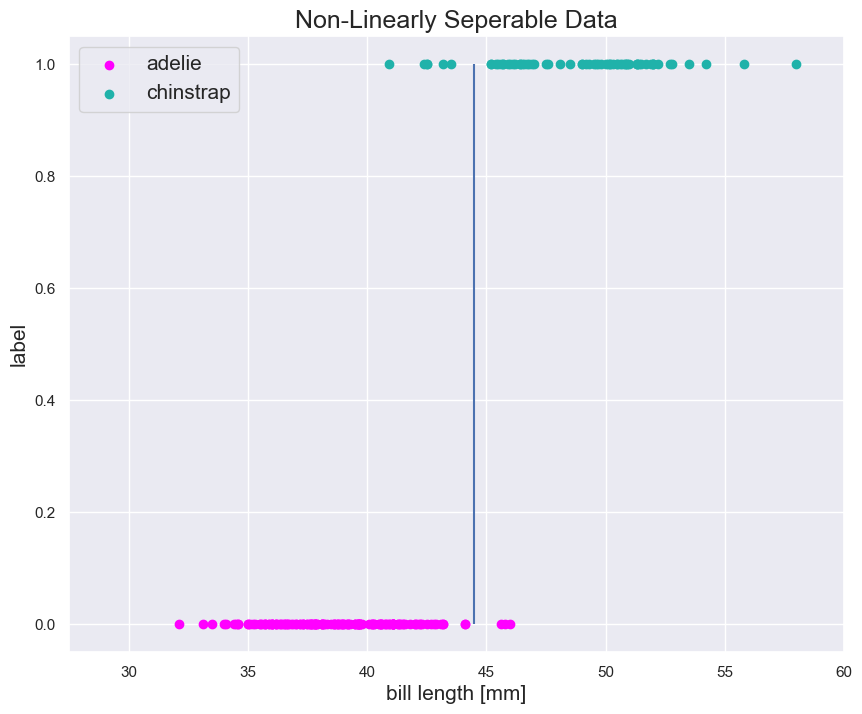

In [11]:
plt.figure(figsize = (10, 8))
plt.xlim((27.5, 60 ))

adelie_len = len(adelie.bill_length_mm)
chinstrap_len = len(chinstrap.bill_length_mm)

plt.scatter(adelie.bill_length_mm, 
            np.zeros(adelie_len), 
            color = "magenta", 
            label = "adelie")
plt.scatter(chinstrap.bill_length_mm, 
            np.ones(chinstrap_len), 
            color = "lightseagreen", 
            label = "chinstrap")
plt.vlines(44.5, 0.0, 1.0)
plt.xlabel("bill length [mm]", fontsize = 15)
plt.ylabel("label", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper left")
plt.title("Non-Linearly Seperable Data", fontsize = 18)
plt.show()

## Part 2: Designing the model

One main feature of the logistic model is its sigmoid activation function, $$\sigma(z) = \frac{1}{1 + e^{-z}}$$

We will compare a plot of the sigmoid function with a plot of our 'binary' data. As shown below, the preliminary result appears promising, as the tails of the sigmoid function flatten out in alignment with the clustering of each species' data points.

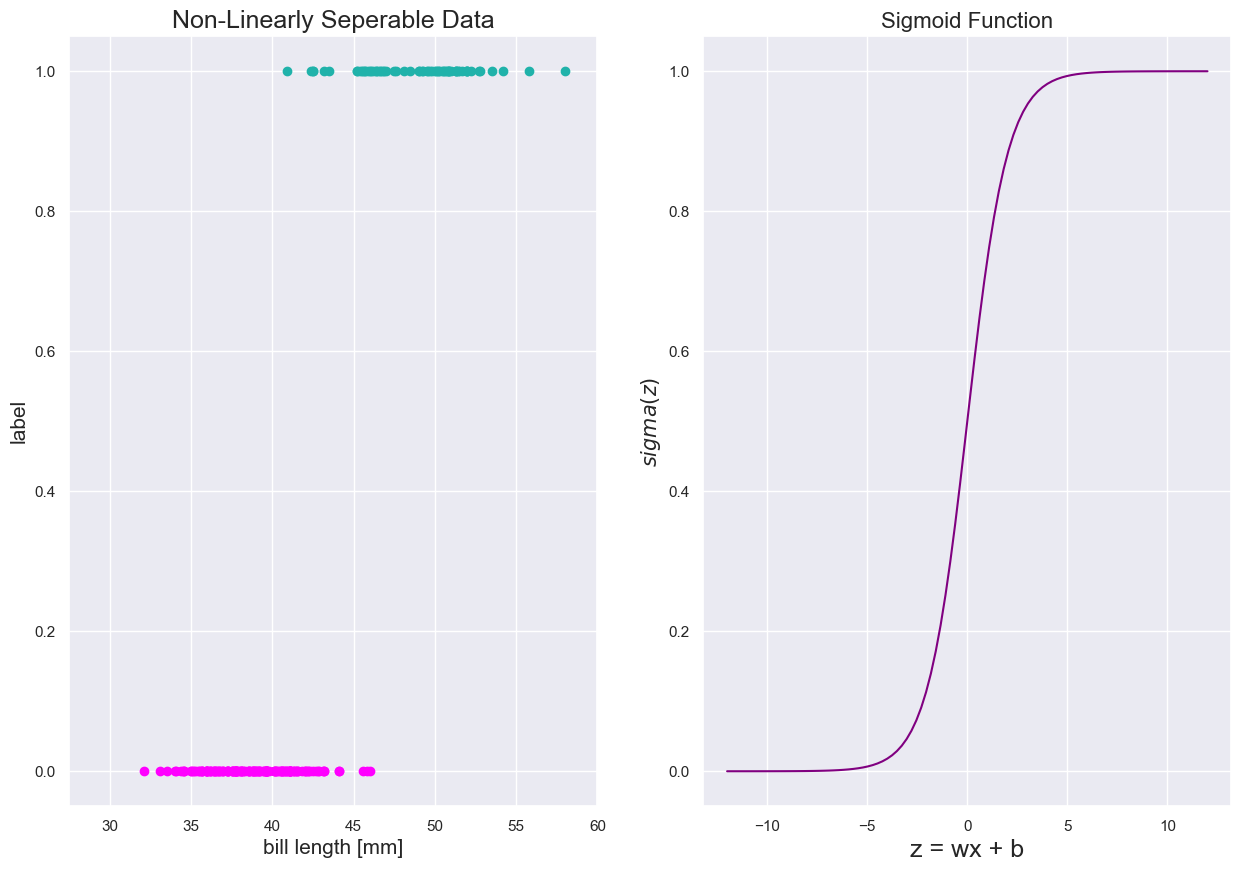

In [24]:
def sigmoid_fn(z):
    return 1.0/(1.0 + np.exp(-z))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ax1.set_xlim((27.5, 60 ))
ax1.scatter(adelie.bill_length_mm, 
            np.zeros(adelie_len), 
            color = "magenta", 
            label = "versicolor")
ax1.scatter(chinstrap.bill_length_mm, 
            np.ones(chinstrap_len), 
            color = "lightseagreen", 
            label = "chinstrap")
ax1.set_xlabel("bill length [mm]", fontsize = 15)
ax1.set_ylabel("label", fontsize = 15)
ax1.set_title("Non-Linearly Seperable Data", fontsize = 18)


domain = np.linspace(-12.0, 12.0, 100)
ax2.plot(domain, 
        sigmoid_fn(domain), 
        color = "purple", 
        label = "sigma(z)")
ax2.set_xlabel("z = wx + b", fontsize = 18)
ax2.set_ylabel("$sigma(z)$", fontsize = 15)
ax2.set_title("Sigmoid Function", fontsize = 16)
plt.show()

We will use

In [25]:
class Neuron(object):
    """
    A class representing a single artificial neuron for binary or regression tasks.

    ...

    Attributes
    ----------
    activation_fn : callable
        The activation function applied to the weighted input (e.g., sigmoid, identity, tanh).

    weights_ : numpy.ndarray
        Weight vector including the bias term (last entry). Initialized during training.

    loss_history_ : list
        Stores the mean squared error after each training epoch.

    Methods
    -------
    fit(self, X, y, learning_rate=0.005, epochs=50)
        Trains the neuron using stochastic gradient descent (SGD) on input data X and labels y.

    predict(self, X)
        Computes the neuron's output for the given input(s) X using the learned weights and activation.
    """

    def __init__(self, activation_fn, cost_fn):
        self.activation_fn = activation_fn
        self.cost_fn = cost_fn

    def fit(self, X, y, learning_rate=0.005, epochs=50):
        self.weights_ = np.random.rand(X.shape[1] + 1)  # Last element is bias
        self.loss_history_ = []
        n_samples = X.shape[0]

        for _ in range(epochs):
            total_error = 0
            for x_i, y_i in zip(X, y):
                y_hat = self.predict(x_i)
                error = y_hat - y_i
                self.weights_[:-1] -= learning_rate * error * x_i  # update weights
                self.weights_[-1]  -= learning_rate * error         # update bias
                total_error += 0.5 * error**2
            self.loss_history_.append(total_error / n_samples)
        return self
    
    def predict(self, X):
        linear_output = np.dot(X, self.weights_[:-1]) + self.weights_[-1]
        return self.activation_fn(linear_output)
    
    def plot_cost_function(self):
        fig, axs = plt.subplots(figsize = (10, 8))
        axs.plot(range(1, len(self.loss_history_) + 1), 
                self.loss_history_,
                label = "Cost function")
        axs.set_xlabel("epochs", fontsize = 15)
        axs.set_ylabel("Cost", fontsize = 15)
        axs.legend(fontsize = 15)
        axs.set_title("Cost Calculated after Epoch During Training", fontsize = 18)
        plt.show()

    def plot_decision_boundary(self, X, y, xstring="x", ystring="y"):
        plt.figure(figsize = (10, 8))
        plot_decision_regions(X, y, clf = self)
        plt.title("Neuron Decision Boundary", fontsize = 18)
        plt.xlabel(xstring, fontsize = 15)
        plt.ylabel(ystring, fontsize = 15)
        plt.show()
